In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_origin = pd.read_csv('Android_Malware_clean.csv', low_memory=False)
df = df_origin.copy()

In [4]:
df.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,2017-06-13 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,37027.000000,0.000000,37027.0,37027.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.000,0.000000,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,2017-06-13 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,36653.000000,0.000000,36653.0,36653.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.00,0.000,0.000000,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,2017-06-13 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,28110.473684,43148.095038,158676.0,8.0,481340.0,68762.857143,62376.182079,158676.0,449.0,487990.0,44362.727273,86342.04254,217790.0,8.0,0.0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,1.0,0.0,0.0,1.0,646.75,126.375,993.666667,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [6]:

# Select features and target variable
features = df[['Flow Duration', 'Total Length of Fwd Packets',
               'Total Length of Bwd Packets', 'Fwd Packet Length Min',
               'Bwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s',
               'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
               'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
               'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
               'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
               'Fwd Packets/s', 'Bwd Packets/s', 'Max Packet Length',
               'Packet Length Variance', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
               'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
               'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max',
               'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
target = df['Label']


# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2,
                                n_estimators=200, class_weight='balanced', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=200,
                       random_state=0)

In [18]:
d = {'Android_Adware': 'Malware', 'Android_SMS_Malware': 'Malware', 'Android_Scareware': 'Malware', 'Benign': 'Non-Malware'}

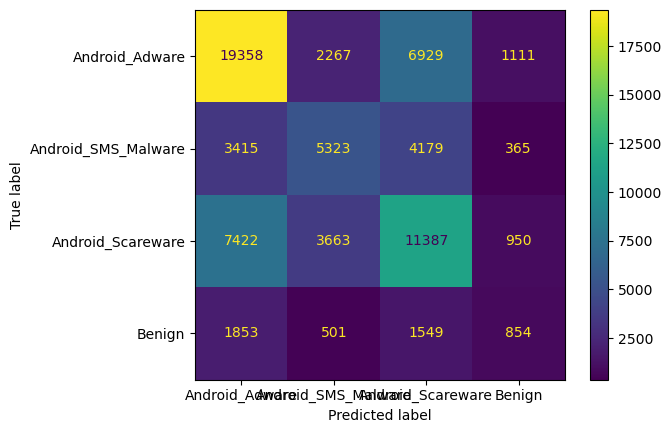

In [10]:
# display_labels=['Non-Fraud', 'Fraud']
ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test)

In [19]:
y_train.replace(d, inplace=True)
y_test.replace(d, inplace=True)

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2,
                                n_estimators=200, class_weight='balanced', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=200,
                       random_state=0)

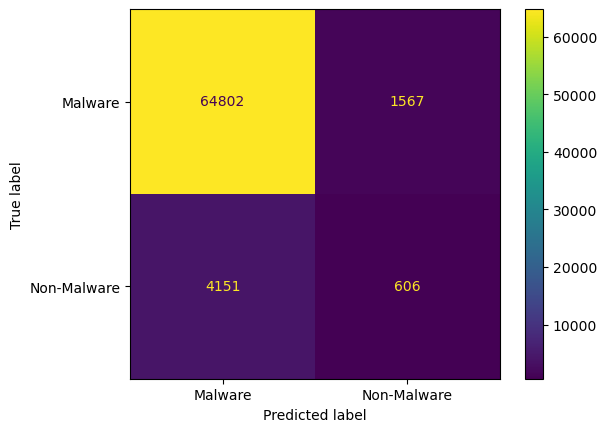

In [21]:
ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test)

In [22]:
tn, fp, fn, tp = confusion_matrix(
    y_test, forest.predict(X_test), labels=forest.classes_).ravel()

precision, recall = tp / (tp+fp), tp / (tp+fn)
pd.options.display.float_format = '{:.3%}'.format
display(pd.DataFrame({
    'name': ['Accuracy', 'Precision', 'Recall(TPR)', 'F-Score', 'FPR(Type I Error)', 'Type II Error'],
    'value': [(tp+tn) / (tp+tn+fp+fn), precision, recall, 2 * (precision*recall) / (precision+recall),
        fp / (fp+tn), fn / (tp+fn)]
}))

,name,value
0,Accuracy,91.961%
1,Precision,27.888%
2,Recall(TPR),12.739%
3,F-Score,17.489%
4,FPR(Type I Error),2.361%
5,Type II Error,87.261%
